<a href="https://www.kaggle.com/code/jenilgajjar/llm-detect-ai-generated-text-using-multinomial?scriptVersionId=152867309" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing Libraries

- **NumPy**: NumPy is used for numerical operations and handling arrays.
- **Pandas**: Pandas is used for data manipulation using DataFrame.
- **scikit-learn**: sklearn-learn provides machine learning tools and utilites.
    - **CountVectorizer**: CountVectorizer is a feature extraction technique that converts a collection of text documents to a matrix of token counts.
    - **MultinomiaNB**: Multinomial Naive Bayes is a probabilistic classification algorithm suitable for classification with discrete features.
    - **Confusion Matrix, Classification Report, ROC Curve, AUC**: These matrics and tools are used for evaluating the performance of machine learning models. 
- **NLTK**: NLTK is used for Natural Language Processing tasks.
    - **stopwords**: stopwords module from NLTK provides a list of common stop words.
    - **PorterStemmer**: PorterStemmer is a stemming algorithm that reduces words to their root or base form. 
- **Matplotlib**: Matplotlib is plotting library for visualizations.
- **re**: re module provides regular expression matching operations.
- **itertools**: itertools module provides a set of fast, memory-efficient tools.

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import itertools
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
# download NLTK stopwords

nltk.download('stopwords') 

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

## Loading and Inpecting Data

In [3]:
trainEssays = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/train_essays.csv")
testEssays = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/test_essays.csv")

In [4]:
trainEssays.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [5]:
testEssays.head()

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


## Processing and Preparing the data for Naive bayes

In [6]:
# Extracting the 'text' and 'generated' columns from the training dataset.

X = trainEssays['text'].values
y = trainEssays['generated'].values

In [7]:
# corpus is an empty list that will be used to store the preprocessed text data
# ps is an instance of the PorterStemmer class from the NLTK library.

corpus = []
ps = PorterStemmer()

In [8]:
# Performing text processing

for text in X:
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = ' '.join([ps.stem(word) for word in text if word not in set(stopwords.words('english'))])
    corpus.append(text)
    
    
# Using CountVectorizer for converting text data into a bag-of-words representation.
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

## Training and Evaluating the Naive Bayes Classifier

In [9]:
# Train a Multinomial Naive Bayes classifier on the training data

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [10]:
# Making predictions on the test data

y_pred = classifier.predict(X_test)

In [11]:
# Printing the confusion matrix and classification report for evaluation

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

print("Classification report:")
print(classification_report(y_test, y_pred))

Confusion Matrix: 
[[342   2]
 [  1   0]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       344
           1       0.00      0.00      0.00         1

    accuracy                           0.99       345
   macro avg       0.50      0.50      0.50       345
weighted avg       0.99      0.99      0.99       345



- The **plot_confusion_matrix** is used to visualize a confusion matrix.

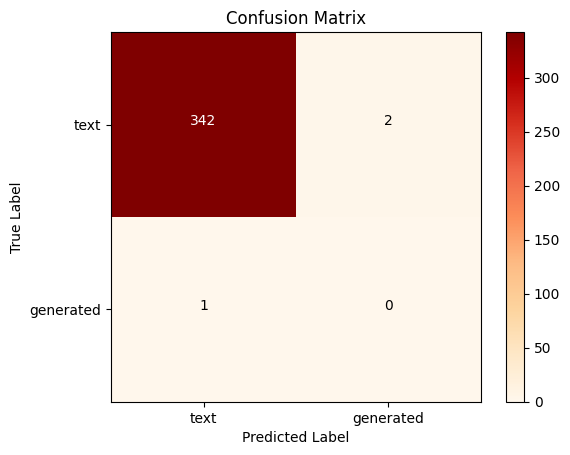

In [12]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.OrRd)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    threshold = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color="white" if cm[i, j] > threshold else "black")
        
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    

plot_confusion_matrix(cm, classes=['text', 'generated'])

- The **plot_roc_curve** function is used to visualize the Receiver Operating Characteristic (ROC) curve. 
- **y_true**: True labels (ground truth) for the data
- **y_score**: Predicted scores
- **roc_curve**: compute receiver operating characteristic curve
- **auc**: compute area under the curve from the ROC curve

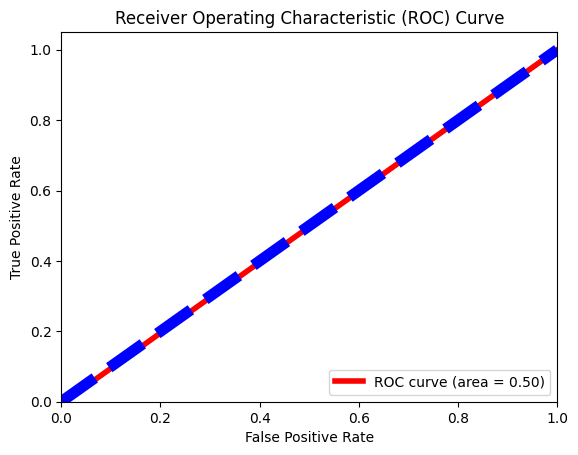

In [13]:
def plot_roc_curve(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    
    # red line represents the ROC curve
    plt.plot(fpr, tpr, color='red', lw = 4, label = 'ROC curve (area = {:.2f})'.format(roc_auc))
    
    # blue dashed line represents the ROC curve of a random classifier
    plt.plot([0, 1], [0, 1], color='blue', lw = 8, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    
y_true = y_test
y_score = y_pred

plot_roc_curve(y_true, y_score)

In [14]:
prediction = y_pred[0:3]
submission_df = pd.DataFrame({'id': testEssays['id'], 'generated': prediction})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)